# FILTERING

OpenCV tiene funciones cv2.dft() y cv2.idft(),y nos proporciona dos canales:

El primer canal representa la parte real del resultado.
El segundo canal para la parte imaginaria del resultado.

Entonces, la forma del np.ndarray devuelto por las funciones será (rows, cols, 2).

In [48]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

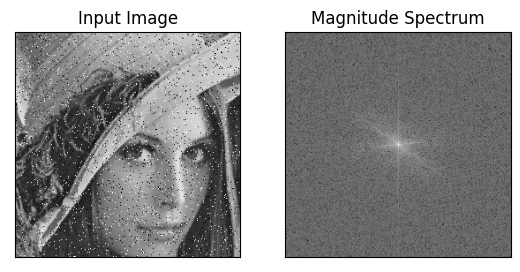

In [49]:
#img = cv2.imread('noisy.png',0)
img = cv2.imread('noisy_lena.png',0)
#print("hola", img.shape)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

## First Part

En esta sección, crearemos un Filtro de paso bajo (low pass filter) LPF para eliminar contenidos de alta frecuencia en la imagen. En otras palabras, vamos a aplicar LPF a la imagen que tiene un efecto suavizado (se aprecia como desenfoque).

Hemos seleccionado un rango r de +-50 unidades para el paso del filtro

### Low Pass Filter

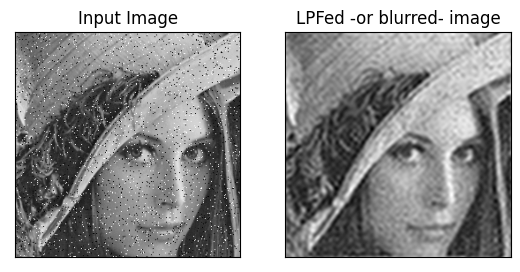

In [50]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
r = 35
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 1

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('LPFed -or blurred- image'), plt.xticks([]), plt.yticks([])

plt.show()    

## High Pass Filter

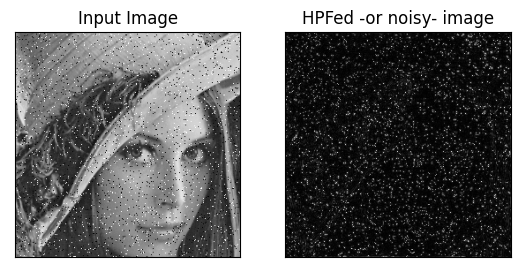

In [51]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
r = 50
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 0

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('HPFed -or noisy- image'), plt.xticks([]), plt.yticks([])

plt.show()    

### Observation:
By modifying "r", we notice that the closer to zero, the more blurry the image is. This is because it starts deleting noise. On the other hand, the greater the value of "r" is, the clearer the image is (but it contains more noise).

### Band Pass Filter

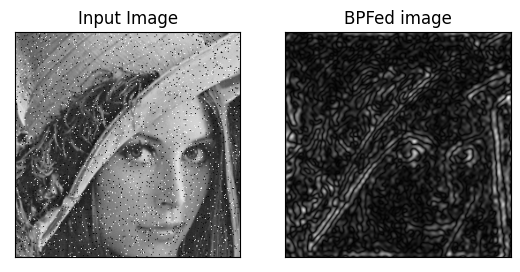

In [52]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
one, two = 35, 10
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-one:crow+one, ccol-one:ccol+one] = 1
mask[crow-two:crow+two, ccol-two:ccol+two] = 0

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('BPFed image'), plt.xticks([]), plt.yticks([])

plt.show()    

(Text(0.5, 1.0, 'Final image'), ([], []), ([], []))

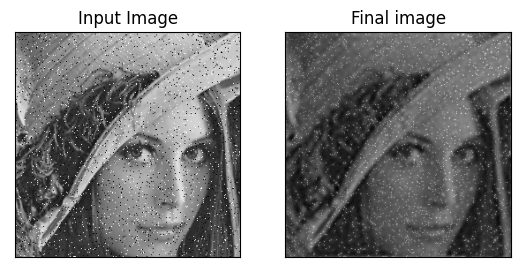

In [53]:
# High Pass Filter
r = 50
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 0
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_One = cv2.idft(f_ishift)
img_One = cv2.magnitude(img_One[:,:,0],img_One[:,:,1])


# Low Pass Filter
r = 30
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 1
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_Two = cv2.idft(f_ishift)
img_Two = cv2.magnitude(img_Two[:,:,0],img_Two[:,:,1])


# Band Pass Filter
one, two = 30, 50
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-one:crow+one, ccol-one:ccol+one] = 1
mask[crow-two:crow+two, ccol-two:ccol+two] = 0
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_Three = cv2.idft(f_ishift)
img_Three = cv2.magnitude(img_Three[:,:,0],img_Three[:,:,1])


# should show the original image
original = img_One + img_Two + img_Three

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(original, cmap = 'gray')
plt.title('Final image'), plt.xticks([]), plt.yticks([])

### Observation:
We have three different filters: High Pass Filter, Low Pass Filter and Band Pass Filter. 

In the case of High Pass Filter, as smaller the "r" is, we get more contrast (this is because our filter is responsible of avoiding low frequencies). In the meantime, as Low Pass Filter's "r" value is closer to 0, the clearer the image is. But, the closer it is to 50, it starts to get blurry. Finally, in the Band Pass Filter, we can observe that the bigger our parameter "one" is, the darker the image gets. And the smaller the "two" parameter is, the image's exposure is greatly increased.

## Second Part

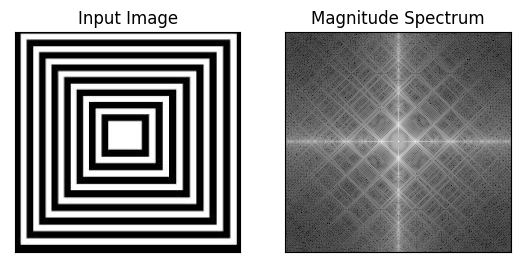

In [54]:
#img = cv2.imread('noisy.png',0)
img = cv2.imread('test_im_1.png',0)
#print("hola", img.shape)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

## Observation

Se ve una cruz porque los bordes son frecuencias altas y constantes. 

Pero al ver la imagen comenzando desde otro punto es posible apreciar que el cambio en las frecuencias es no constante, con cambios periodicos que cambian casi al final. 

Por eso la matricula se difumina a la distancia.

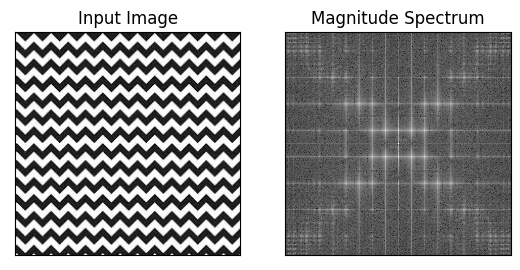

In [55]:
#img = cv2.imread('noisy.png',0)
img = cv2.imread('test_im_2.png',0)
#print("hola", img.shape)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

## Observations

In this case, the image changes in any direction it's seen. Thus, the frequency domain displays a pretty clear grid.